In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import timeit
import pickle
import sys
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, \
                            precision_recall_curve, roc_curve, accuracy_score
from sklearn.exceptions import NotFittedError

In [3]:
X_test = np.load('/content/drive/MyDrive/2021_VIIT08_P300/Dataset/bci-ner/XDAWN/X_test.npy')
X_train = np.load('/content/drive/MyDrive/2021_VIIT08_P300/Dataset/bci-ner/XDAWN/X_train.npy')
y_train=np.load('/content/drive/MyDrive/2021_VIIT08_P300/Dataset/bci-ner/Y_train.npy')
y_test = np.reshape(pd.read_csv('/content/drive/MyDrive/2021_VIIT08_P300/Dataset/bci-ner/true_labels.csv', header=None).values, 3400)
X_test.shape,X_train.shape,y_train.shape,y_test.shape

((3400, 210), (5440, 210), (5440,), (3400,))

In [4]:
pip install lightgbm

In [5]:
from lightgbm import LGBMClassifier 

In [6]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [7]:
lgbm = LGBMClassifier()

In [8]:
lgbm.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [9]:
y_preds=lgbm.predict(X_test)
cr = classification_report(y_test,y_preds)
print(cr)

              precision    recall  f1-score   support

           0       0.65      0.31      0.42       989
           1       0.77      0.93      0.84      2411

    accuracy                           0.75      3400
   macro avg       0.71      0.62      0.63      3400
weighted avg       0.73      0.75      0.72      3400



In [10]:
confusion_matrix(y_test,y_preds)

array([[ 308,  681],
       [ 167, 2244]])

Hyper-Parameter Tuning using Optuna

In [11]:
pip install scikit-learn

In [12]:
pip install optuna

     |████████████████████████████████| 302 kB 29.5 MB/s 
     |████████████████████████████████| 208 kB 54.4 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 75 kB 4.5 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 141 kB 52.0 MB/s 
     |████████████████████████████████| 111 kB 56.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=a310b3a3755882fed272b8305a66e76b8eb7c0fb3a03808bab73a2837f48ed2f
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [13]:
import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler
# from a import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [14]:
def objective(trial) -> float:
    
    # joblib.dump(study, 'study.pkl')
    
    # train_X,test_X,train_y,test_y = train_test_split(X, Y, test_size = 0.30,random_state = 101)
    # dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
 
    
    lgbm = LGBMClassifier(**param)
    lgbm.fit(X_train,y_train)
    preds = lgbm.predict(X_test)
    # pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, preds)
    return accuracy
    

In [15]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-09-05 07:29:21,715] A new study created in memory with name: no-name-0284409b-7a16-4e57-bba5-9e7603c86e92
[I 2021-09-05 07:29:23,756] Trial 0 finished with value: 0.7394117647058823 and parameters: {'lambda_l1': 0.0005705262644884834, 'lambda_l2': 1.636768278456562e-07, 'num_leaves': 37, 'feature_fraction': 0.5303597331983532, 'bagging_fraction': 0.6305611757146473, 'bagging_freq': 6, 'min_child_samples': 83}. Best is trial 0 with value: 0.7394117647058823.
[I 2021-09-05 07:29:42,189] Trial 1 finished with value: 0.7397058823529412 and parameters: {'lambda_l1': 1.0307316804992221e-08, 'lambda_l2': 2.5419898742304653e-05, 'num_leaves': 151, 'feature_fraction': 0.8851103595957702, 'bagging_fraction': 0.712636592020673, 'bagging_freq': 6, 'min_child_samples': 9}. Best is trial 1 with value: 0.7397058823529412.
[I 2021-09-05 07:29:46,057] Trial 2 finished with value: 0.7382352941176471 and parameters: {'lambda_l1': 0.7037697293968711, 'lambda_l2': 2.196413947088538e-08, 'num_leaves

In [16]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 100
Best trial: {'lambda_l1': 1.6346593540967918e-07, 'lambda_l2': 0.3481060103425268, 'num_leaves': 84, 'feature_fraction': 0.6893603318400958, 'bagging_fraction': 0.6538537081338699, 'bagging_freq': 5, 'min_child_samples': 63}


In [27]:
best_params={'lambda_l1': 0.06770730346819898, 'lambda_l2': 0.022431428511784306, 'num_leaves': 94, 'feature_fraction': 0.8751672826088824, 'bagging_fraction': 0.6485349829513737, 'bagging_freq': 4, 'min_child_samples': 79}

In [26]:
best_params, tuning_history = dict(), list()
# booster = lgbm.train(params, dtrain, valid_sets=dval,
#                     verbose_eval=0,
#                     best_params=best_params,
#                     tuning_history=tuning_history)
 
print( best_params)
print( tuning_history)

{}
[]


In [28]:
lgbm = LGBMClassifier(**best_params)
lgbm.fit(X_train,y_train)

LGBMClassifier(bagging_fraction=0.6485349829513737, bagging_freq=4,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.8751672826088824, importance_type='split',
               lambda_l1=0.06770730346819898, lambda_l2=0.022431428511784306,
               learning_rate=0.1, max_depth=-1, min_child_samples=79,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=94, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [29]:
y_preds=lgbm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cls = classification_report(y_test,y_preds)
print(cls)
print("------------COnfusion Matrix---------------")
confusion_matrix(y_test,y_preds)


              precision    recall  f1-score   support

           0       0.64      0.37      0.47       989
           1       0.78      0.91      0.84      2411

    accuracy                           0.76      3400
   macro avg       0.71      0.64      0.66      3400
weighted avg       0.74      0.76      0.73      3400

------------COnfusion Matrix---------------


array([[ 367,  622],
       [ 209, 2202]])

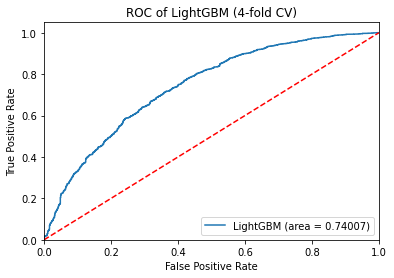

In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict the probability of our label score
Y_pred_proba = lgbm.predict_proba(X_test)

r_roc_auc = roc_auc_score(y_test, Y_pred_proba[:,1])
fpr, tpr, thresholds = roc_curve(y_test, Y_pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LightGBM (area = %0.5f)' % r_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LightGBM (4-fold CV)')
plt.legend(loc="lower right")
# plt.savefig('images2/Randomforest_ROC')
plt.show()

In [31]:
optuna.visualization.plot_param_importances(study)

### Optuna with hyperparameter importance threshold

In [32]:
def objective(trial) -> float:
    
    # joblib.dump(study, 'study.pkl')
    
    # train_X,test_X,train_y,test_y = train_test_split(X, Y, test_size = 0.30,random_state = 101)
    # dtrain = lgb.Dataset(X_train, label=y_train)
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        # 'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        # 'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
 
    
    lgbm = LGBMClassifier(**param)
    lgbm.fit(X_train,y_train)
    preds = lgbm.predict(X_test)
    # pred_labels = np.rint(preds)
    accuracy = accuracy_score(y_test, preds)
    return accuracy

In [33]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-09-05 07:47:22,879] A new study created in memory with name: no-name-f15368e8-d712-49c9-be0e-b3973941e5b4
[I 2021-09-05 07:47:34,820] Trial 0 finished with value: 0.7376470588235294 and parameters: {'lambda_l1': 2.496823318106987e-05, 'num_leaves': 167, 'feature_fraction': 0.4936047404381428, 'bagging_fraction': 0.6563370779174899, 'min_child_samples': 12}. Best is trial 0 with value: 0.7376470588235294.
[I 2021-09-05 07:47:40,177] Trial 1 finished with value: 0.7497058823529412 and parameters: {'lambda_l1': 2.285089048171828e-08, 'num_leaves': 240, 'feature_fraction': 0.8246992431018438, 'bagging_fraction': 0.40721719851106697, 'min_child_samples': 70}. Best is trial 1 with value: 0.7497058823529412.
[I 2021-09-05 07:47:43,674] Trial 2 finished with value: 0.7520588235294118 and parameters: {'lambda_l1': 1.4332667225205412e-06, 'num_leaves': 42, 'feature_fraction': 0.47891703571246313, 'bagging_fraction': 0.4043306639646953, 'min_child_samples': 32}. Best is trial 2 with value

In [34]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 100
Best trial: {'lambda_l1': 0.00018429541031749784, 'num_leaves': 46, 'feature_fraction': 0.4437442158795126, 'bagging_fraction': 0.4554076321530495, 'min_child_samples': 59}


In [35]:
lgbm = LGBMClassifier(**study.best_trial.params)
lgbm.fit(X_train,y_train)

LGBMClassifier(bagging_fraction=0.4554076321530495, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.4437442158795126, importance_type='split',
               lambda_l1=0.00018429541031749784, learning_rate=0.1,
               max_depth=-1, min_child_samples=59, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=46,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [36]:
y_preds=lgbm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cls = classification_report(y_test,y_preds)
print(cls)
print("------------COnfusion Matrix---------------")
confusion_matrix(y_test,y_preds)


              precision    recall  f1-score   support

           0       0.66      0.34      0.44       989
           1       0.77      0.93      0.84      2411

    accuracy                           0.76      3400
   macro avg       0.71      0.63      0.64      3400
weighted avg       0.74      0.76      0.73      3400

------------COnfusion Matrix---------------


array([[ 333,  656],
       [ 175, 2236]])

In [37]:
optuna.visualization.plot_param_importances(study)

Hyperparameter Tuning 1

In [ ]:
import lightgbm as lgb

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

def objective(trial) -> float:
  param = {
      'objective': 'binary',
      'metric': 'binary_logloss',
      'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
      'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
      'num_leaves': 50,
      'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
      'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
      'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
      'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
      'max_depth': trial.suggest_int('num_leaves', 2,7 ), 
      'min_data_in_leaf': 20,
      'boosting_type': 'dart',
       }
  lgbm = LGBMClassifier(**param)
  lgbm.fit(X_train,y_train)
  preds = lgbm.predict(X_test)
    # pred_labels = np.rint(preds)
  accuracy = accuracy_score(y_test, preds)
  return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

In [ ]:
lgbm = LGBMClassifier(**study.best_trial.params)
lgbm.fit(X_train,y_train)

In [ ]:
y_preds=lgbm.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
cls = classification_report(y_test,y_preds)
print(cls)
print("------------COnfusion Matrix---------------")
confusion_matrix(y_test,y_preds)

In [ ]:
lgbm.score(X_train,y_train)

In [ ]:
lgbm.score(X_test,y_test)